# VizKG

In [1]:
# !pip install VizKG

In [2]:
import VizKG.visualize as vkg

help(vkg)

Help on class vizKG:

class vizKG(builtins.object)
 |  vizKG(sparql_query, sparql_service_url, chart=None, **kwargs)
 |  
 |  Instantiate vizKG object.
 |  
 |  Attributes:
 |      sparql_query (string): The SPARQL query to retrieve.
 |      sparql_service_url (string): The SPARQL endpoint URL.
 |      chart (string): Type of visualization
 |                     Options = {'Table', 'ImageGrid', 'Timeline' 'Graph' 
 |                                'Map', 'Tree','WordCloud', 'Dimensions',
 |                                'LineChart', 'BarChart', 'Histogram',
 |                                'DensityPlot', 'TreeMap' ,'SunBurstChart', 
 |                                'HeatMap' ,'PieChart', 'DonutChart',
 |                                'BoxPlot' ,'ViolinPlot', 'AreaChart',
 |                                'StackedAreaChart', 'ScatterChart', 'BubbleChart'}.
 |      **mode_keyword (boolean): Mode of mapping variable                           
 |      **figsize (float, float): Width, h

# BubbleChart

In [52]:
sparql_query = """
#Ethnic group in Indonesia
#defaultView:BubbleChart
SELECT DISTINCT ?itemLabel ?population
WHERE
{
  ?item wdt:P31 wd:Q83828 ;
        wdt:P1082 ?population .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "id" }
}
ORDER BY DESC (?population)
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
bubble = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='BubbleChart')
bubble.plot()

# WordCloud

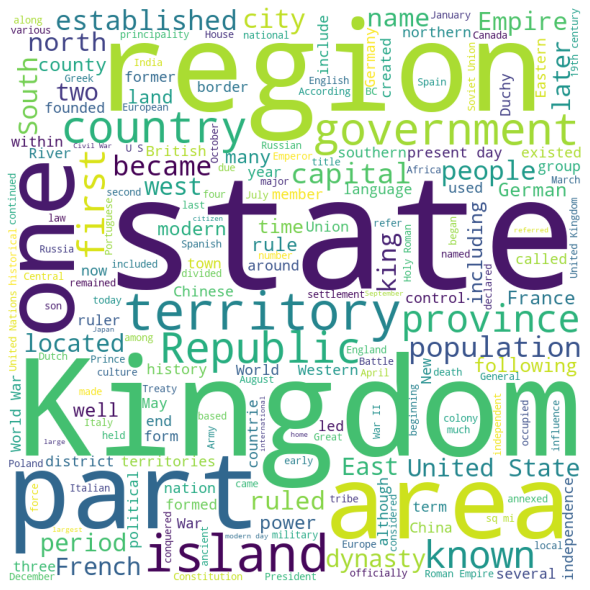

In [4]:
sparql_query = """
#Abstract of all countries
    PREFIX owl: <http://www.w3.org/2002/07/owl#>
    PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX foaf: <http://xmlns.com/foaf/0.1/>
    PREFIX dc: <http://purl.org/dc/elements/1.1/>
    PREFIX : <http://dbpedia.org/resource/>
    PREFIX dbpedia2: <http://dbpedia.org/property/>
    PREFIX dbpedia: <http://dbpedia.org/>
    PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

    SELECT DISTINCT ?abstract
          WHERE { 
                  ?x rdf:type dbo:Country;
                            dbo:abstract ?abstract.
                  FILTER (lang(?abstract) = 'en')
    }
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "http://dbpedia.org/sparql"
words = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='WordCloud')
words.plot()

# Treemaps, Sunburst

In [44]:
sparql_query = """
#Number of employees based on job title
    PREFIX foaf: <http://xmlns.com/foaf/0.1/>
    PREFIX schema: <http://schema.org/jobTitle>

    SELECT DISTINCT ?jobTitle (COUNT(?jobTitle) as ?count)
    WHERE {?s a foaf:Person .
    ?s <http://schema.org/jobTitle> ?jobTitle .
      FILTER (lang(?jobTitle) != 'en')
      
    }
    GROUP BY ?jobTitle
    HAVING (?count > 10)
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://data.open.ac.uk/sparql"
tree = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='TreeMap')
tree.plot()

In [45]:
sparql_query = """
#Number of employees based on job title
    PREFIX foaf: <http://xmlns.com/foaf/0.1/>
    PREFIX schema: <http://schema.org/jobTitle>

    SELECT DISTINCT ?jobTitle (COUNT(?jobTitle) as ?count)
    WHERE {?s a foaf:Person .
    ?s <http://schema.org/jobTitle> ?jobTitle .
      FILTER (lang(?jobTitle) != 'en')
      
    }
    GROUP BY ?jobTitle
    HAVING (?count > 10)
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://data.open.ac.uk/sparql"
sunburst = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='SunBurstChart')
sunburst.plot()

## two labels

In [53]:
sparql_query = """
#Number of people who has particular eyescolor and haircolor
#defaultView:TreeMap
SELECT ?eyes ?hairColorLabel (COUNT(?person) as ?count)
WHERE
{
        ?person wdt:P1340 ?eyeColor.
    ?person wdt:P1884 ?hairColor.
    ?person wdt:P2048 ?height.
    ?eyeColor rdfs:label ?_eyeColorLabel.
    FILTER((LANG(?_eyeColorLabel)) = "en")
    BIND(CONCAT(?_eyeColorLabel, " eyes") AS ?eyes)
        SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
}

GROUP BY ?eyes ?hairColorLabel
ORDER BY DESC(?count)
LIMIT 20
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
treemap = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='TreeMap')
treemap.plot()

In [54]:
sparql_query = """
#Number of people who has particular eyescolor and haircolor
    #defaultView:TreeMap
    SELECT ?eyes ?hairColorLabel (COUNT(?person) as ?count)
    WHERE
    {
            ?person wdt:P1340 ?eyeColor.
        ?person wdt:P1884 ?hairColor.
        ?person wdt:P2048 ?height.
        ?eyeColor rdfs:label ?_eyeColorLabel.
        FILTER((LANG(?_eyeColorLabel)) = "en")
        BIND(CONCAT(?_eyeColorLabel, " eyes") AS ?eyes)
            SERVICE wikibase:label { bd:serviceParam wikibase:language "en". }
    }
    
    GROUP BY ?eyes ?hairColorLabel
    ORDER BY DESC(?count)
    LIMIT 20
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='SunBurstChart')
chart.plot()

# Tree

In [4]:
sparql_query = """
  #Properties of Indonesia (wd:Q252) grouped by their parent property
  #defaultView:Tree
  SELECT DISTINCT ?property1 ?property1Label ?property2Label ?property2 WHERE {
    VALUES (?country) {(wd:Q252)}
    
    ?country ?property ?statement .
    ?property1 wikibase:directClaim ?property.
    ?property2 wdt:P1647 ?property1.

    SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],id, en". }

  }
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
tree = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='Tree')
tree.plot()

adalah
├── peringkat takson
├── eksemplar dari
├── penetapan warisan
├── bentuk legal
├── kelas kapal
└── jenis morfologi galaksi
gambar
├── rank insignia
├── twin town sign
├── view
├── ikon
├── gambar bendera
├── creator's signature
├── aerial view
├── tanda tangan
├── image of interior
├── gambar lambang
├── related image
├── gambar lambang negara
├── struktur kimia
├── winter view
├── place name sign
├── peta persebaran takson
├── schematic
├── peta lokasi
├── sail emblem
├── non-free artwork image URL
├── spanduk halaman
├── peta persebaran
├── gambar kolase
├── commemorative plaque image
├── image of grave
├── sectional view
├── film poster
├── nighttime view
└── molecular model or crystal lattice model
negara
├── kewarganegaraan
├── country for sport
└── negara asal
bendera
koordinat tempat
├── aerodrome reference point
└── coordinates of geographic center
sejak
├── introduced on
└── tanggal lahir
bagian dari
├── ruang warna
├── ikut serta dalam
│   ├── konflik
│   ├── liga
│   

# Pie chart and donut

In [47]:
sparql_query = """
    #Number of Computer Scientist in Indonesia
    SELECT ?genderLabel (COUNT(?genderLabel) as ?count)
    WHERE {
      ?item wdt:P31 wd:Q5;
            wdt:P27 wd:Q252;
            wdt:P106 wd:Q82594;
            wdt:P21 ?gender.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
    }
    GROUP BY ?itemLabel ?genderLabel
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='PieChart')
chart.plot()

In [48]:
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='DonutChart')
chart.plot()

# Heatmap

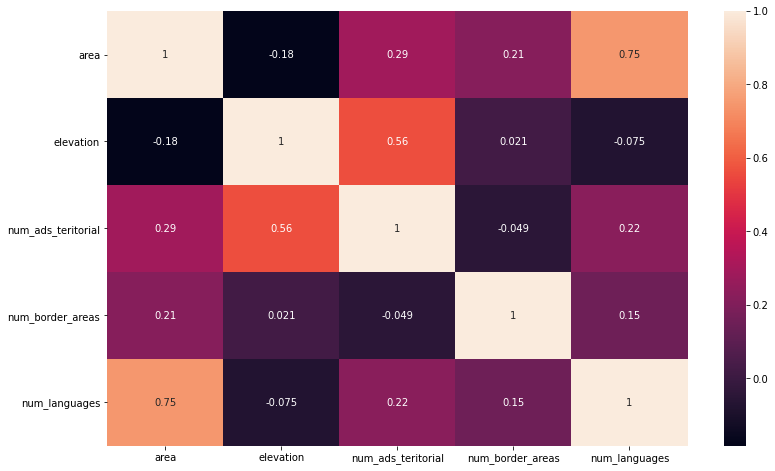

In [7]:
sparql_query = """
# Correlation between 'area', 'elevation', 'num_ads_teritori', 'num_border_areas', and 'num_languages' of indonesia
SELECT ?itemLabel ?elevation ?num_ads_teritorial ?num_border_areas ?num_languages ?area WHERE {
  {
    SELECT ?itemLabel ?area ?elevation WHERE {
      ?item wdt:P31 wd:Q5098;
            wdt:P706 ?island;
            wdt:P2046 ?area;
            wdt:P2044 ?elevation.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
    }
  }
  {
    SELECT ?itemLabel (COUNT(?ads_teritorial) AS ?num_ads_teritorial ) WHERE {
      ?item wdt:P31 wd:Q5098;
            wdt:P150 ?ads_teritorial.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
    }
    GROUP BY ?itemLabel
  }
  {
    SELECT ?itemLabel (COUNT(?border_area) AS ?num_border_areas ) WHERE {
      ?item wdt:P31 wd:Q5098;
            wdt:P47 ?border_area.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
    }
    GROUP BY ?itemLabel
  }
  {
    SELECT ?itemLabel (COUNT(?language) AS ?num_languages ) WHERE {
      ?item wdt:P31 wd:Q5098;
            wdt:P2936 ?language.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
    }
    GROUP BY ?itemLabel
  }

}
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
heatmap = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='heatm')
heatmap.plot()

# AreaChart

In [49]:
sparql_query = """
#Population in the indonesia and malaysia
#defaultView:AreaChart
SELECT ?year ?popValue ?countryLabel {
  VALUES ?country { wd:Q252 wd:Q833 wd:Q183 }
  ?country p:P1082 ?popResource .
  ?popResource ps:P1082 ?popValue ;
                pq:P585 ?time .
  BIND(STR(YEAR(?time)) AS ?year)
  
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
Area = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='AreaChart')
Area.plot()

#  Histogram, DensityPlot, BoxPlot, ViolinPlot

In [9]:
sparql_query = """
#Distribution of indonesian's mass based on gender
SELECT ?item ?mass ?genderLabel
WHERE 
{
  ?item wdt:P31 wd:Q5;
        wdt:P27 wd:Q252;
        wdt:P2067 ?mass;
        wdt:P21 ?gender.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
"""
sparql_service_url = "https://query.wikidata.org/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='Histogram')
chart.plot()

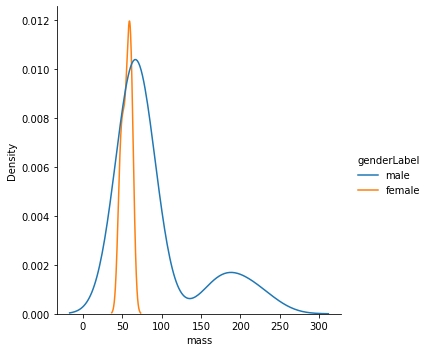

In [10]:
sparql_query = """
#Distribution of indonesian's mass based on gender
SELECT ?item ?mass ?genderLabel
WHERE 
{
  ?item wdt:P31 wd:Q5;
        wdt:P27 wd:Q252;
        wdt:P2067 ?mass;
        wdt:P21 ?gender.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
"""
sparql_service_url = "https://query.wikidata.org/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='DensityPlot')
chart.plot()

In [50]:
sparql_query = """
#Distribution of indonesian's mass based on gender
SELECT ?item ?mass ?genderLabel
WHERE 
{
  ?item wdt:P31 wd:Q5;
        wdt:P27 wd:Q252;
        wdt:P2067 ?mass;
        wdt:P21 ?gender.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
"""
sparql_service_url = "https://query.wikidata.org/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='BoxPlot')
chart.plot()

In [12]:
sparql_query = """
#Distribution of indonesian's mass based on gender
SELECT ?item ?mass ?genderLabel
WHERE 
{
  ?item wdt:P31 wd:Q5;
        wdt:P27 wd:Q252;
        wdt:P2067 ?mass;
        wdt:P21 ?gender.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
"""
sparql_service_url = "https://query.wikidata.org/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='violin')
chart.plot()

## population of each province in indonesia

In [39]:
sparql_query = """
    #population of each province in indonesia
    SELECT DISTINCT ?itemLabel ?population
    WHERE
    {
      ?item wdt:P31 wd:Q5098;
            wdt:P1082 ?population .
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE]id,en" }
    }
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
histo = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='histo')
histo.plot()

In [40]:
sparql_query = """
    #population of each province in indonesia
    SELECT DISTINCT ?itemLabel ?population
    WHERE
    {
      ?item wdt:P31 wd:Q5098;
            wdt:P1082 ?population .
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE]id,en" }
    }
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
density = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='dnsty')
density.plot()

In [41]:
sparql_query ="""
#population of each province in indonesia
SELECT DISTINCT ?countryLabel ?population
WHERE
{
  VALUES ?country { wd:Q5098} #indonesia and vietnam
  ?item wdt:P31 ?country;
        wdt:P1082 ?population .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" }
}
"""
sparql_service_url = "https://query.wikidata.org/sparql"
histogram = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='boxplot')
histogram.plot()

In [42]:
sparql_query ="""
#population of each province in indonesia
SELECT DISTINCT ?countryLabel ?population
WHERE
{
  VALUES ?country { wd:Q5098} #indonesia and vietnam
  ?item wdt:P31 ?country;
        wdt:P1082 ?population .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" }
}
"""
sparql_service_url = "https://query.wikidata.org/sparql"
violin = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='violin')
violin.plot()

## 2 labels

In [43]:
sparql_query ="""
#population of each province in indonesia, thailand and vietnam
SELECT DISTINCT ?countryLabel ?population
WHERE
{
  VALUES ?country { wd:Q5098 wd:Q24746 wd:Q50198 } #indonesia and vietnam
  ?item wdt:P31 ?country;
        wdt:P1082 ?population .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" }
}
"""
sparql_service_url = "https://query.wikidata.org/sparql"
histogram = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='Histogram')
histogram.plot()

In [38]:
sparql_query ="""
#population of each province in indonesia, thailand and vietnam
SELECT DISTINCT ?countryLabel ?population
WHERE
{
  VALUES ?country { wd:Q5098 wd:Q24746 wd:Q50198 } #indonesia and vietnam
  ?item wdt:P31 ?country;
        wdt:P1082 ?population .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" }
}
"""
sparql_service_url = "https://query.wikidata.org/sparql"
density = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='DensityPlot')
density.plot()

In [37]:
sparql_query ="""
#population of each province in indonesia, thailand and vietnam
SELECT DISTINCT ?countryLabel ?population
WHERE
{
  VALUES ?country { wd:Q5098 wd:Q24746 wd:Q50198 } #indonesia and vietnam
  ?item wdt:P31 ?country;
        wdt:P1082 ?population .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" }
}
"""
sparql_service_url = "https://query.wikidata.org/sparql"
boxplot = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='BoxPlot')
boxplot.plot()

In [36]:
sparql_query ="""
#population of each province in indonesia, thailand and vietnam
SELECT DISTINCT ?countryLabel ?population
WHERE
{
  VALUES ?country { wd:Q5098 wd:Q24746 wd:Q50198 } #indonesia and vietnam
  ?item wdt:P31 ?country;
        wdt:P1082 ?population .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" }
}
"""
sparql_service_url = "https://query.wikidata.org/sparql"
violin = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='ViolinPlot')
violin.plot()

# StackedArea

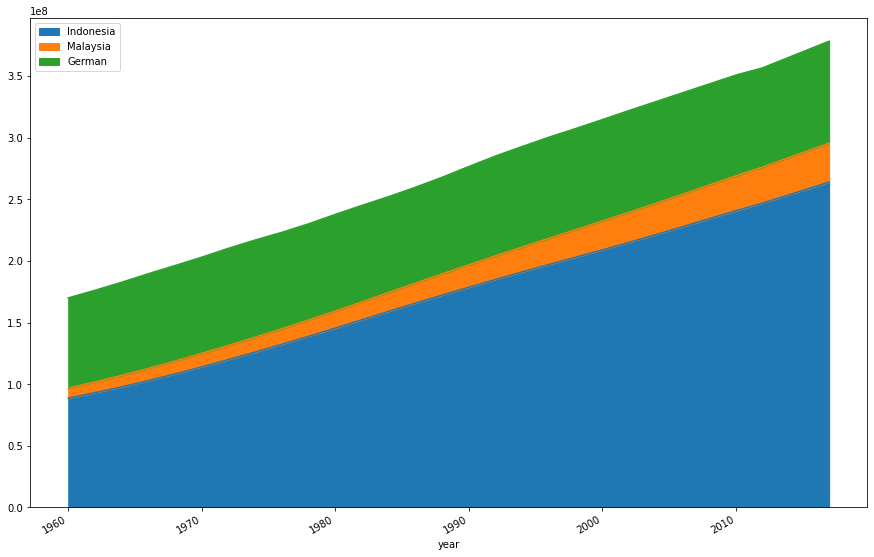

In [21]:
sparql_query = """
#Population growth in Indonesia, Malaysia and German
SELECT DISTINCT ?year ?Indonesia ?Malaysia ?German WHERE {
  {
    SELECT DISTINCT ?year ?Indonesia WHERE {
      wd:Q252 p:P1082 ?popResource .
      ?popResource ps:P1082 ?Indonesia ;
                   pq:P585 ?time .
      BIND((YEAR(?time)) AS ?year)
      #FILTER (?year < 2010)
      SERVICE wikibase:label { bd:serviceParam wikibase:language "id". }
    }
  }
  {
    SELECT DISTINCT ?year ?Malaysia WHERE {
      wd:Q833 p:P1082 ?popResource .
      ?popResource ps:P1082 ?Malaysia ;
                   pq:P585 ?time .
      BIND((YEAR(?time)) AS ?year)
      #FILTER (?year < 2010)
      SERVICE wikibase:label { bd:serviceParam wikibase:language "id". }
    }
  }
  {
    SELECT DISTINCT ?year ?German WHERE {
      wd:Q183 p:P1082 ?popResource .
      ?popResource ps:P1082 ?German  ;
                   pq:P585 ?time .
      BIND((YEAR(?time)) AS ?year)
      #FILTER (?year < 2010)
      SERVICE wikibase:label { bd:serviceParam wikibase:language "id". }
    }
  }
  
}
ORDER BY DESC (?year)

    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
stackedarea = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='StackedAreaChart')
stackedarea.plot()

# LineChart

In [51]:
sparql_query = """
    #Population growth in Suriname from 1960 onward
    #defaultView:LineChart
    SELECT ?year ?population {
      wd:Q730 p:P1082 ?p .
      ?p pq:P585 ?year ;
         ps:P1082 ?population .
      SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
    }
    ORDER BY ?year
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
line = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='LineChart')
line.plot()

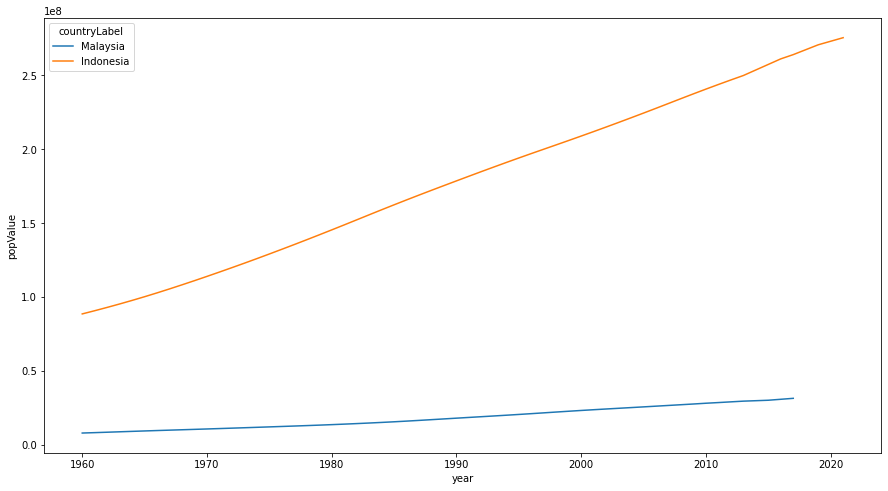

In [23]:
sparql_query = """
#Population growth in Indonesia and Malaysia
SELECT ?year ?popValue ?countryLabel {
  VALUES ?country { wd:Q252 wd:Q833 }
  ?country p:P1082 ?popResource .
  ?popResource ps:P1082 ?popValue ;
                pq:P585 ?time .
  BIND(STR(YEAR(?time)) AS ?year)
  
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}
"""
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
line = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='LineChart')
line.plot()

# ScatterChart

In [24]:
sparql_query = """
#number of languages and area in each of ASEAN country
#defaultView:ScatterChart
SELECT ?area ?languages ?countryLabel WHERE {
  {
    SELECT DISTINCT ?country ?countryLabel ?area WHERE {
      ?country wdt:P463 wd:Q7768;
                wdt:P2046 ?area.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "id". }
    }
    GROUP BY ?country ?countryLabel ?area
  }
  {
    SELECT DISTINCT ?country ?countryLabel (COUNT(?language) AS ?languages) WHERE {
      ?country wdt:P463 wd:Q7768;
                wdt:P2936 ?language.
      SERVICE wikibase:label { bd:serviceParam wikibase:language "id". }
    }
    GROUP BY ?country ?countryLabel ?languages
  }
}
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
scatter = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='ScatterChart')
scatter.plot()

# BarChart

In [35]:
sparql_query = """
    #population of each province in indonesia
    #defaultView:BarChart
    SELECT DISTINCT ?itemLabel ?population
    WHERE
    {
      ?item wdt:P31 wd:Q5098;
            wdt:P1082 ?population .
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE]id,en" }
    }
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
bar = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='BarChart')
bar.plot()

# Stacked Bar Chart

In [26]:
sparql_query = """
#Top number of member in each Indonesia political party
SELECT DISTINCT ?political_partyLabel ?genderLabel (COUNT(?item) AS ?number_of_member)
WHERE
{
  ?item wdt:P31 wd:Q5;
        wdt:P27 wd:Q252;
        wdt:P102 ?political_party;
        wdt:P21 ?gender.
  ?political_party wdt:P571 ?inceptionDate.
  FILTER (YEAR(?inceptionDate) > 1960)
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],id" }
}
GROUP BY ?political_party ?political_partyLabel ?genderLabel
HAVING (?number_of_member >= 10)
ORDER BY DESC (?number_of_member)
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='BarChart')
chart.plot()

# Dimension

In [27]:
sparql_query = """
#Gender and ethnic distribution in the National Hero of Indonesia
#defaultView:Dimensions
SELECT ?genderLabel ?nameLabel ?ethnicLabel WHERE {
  ?name wdt:P166 wd:Q1369309;
        wdt:P21 ?gender;
        wdt:P172 ?ethnic .
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],id". }
}
"""
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='Dimensions')
chart.plot()

# Timeline

In [28]:
sparql_query = """
    #defaultView:Timeline
    #Birth date of president of indonesia 
    SELECT ?bornDate ?person ?personLabel 
    WHERE
    {
      ?person wdt:P31 wd:Q5;
              wdt:P39 wd:Q11755916;
              wdt:P569 ?bornDate.
      OPTIONAL { ?person wdt:P570 ?deathDate }
      SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
    }
    ORDER BY ?date
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
timeline = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart="Timeline")
timeline.plot()

# Graph

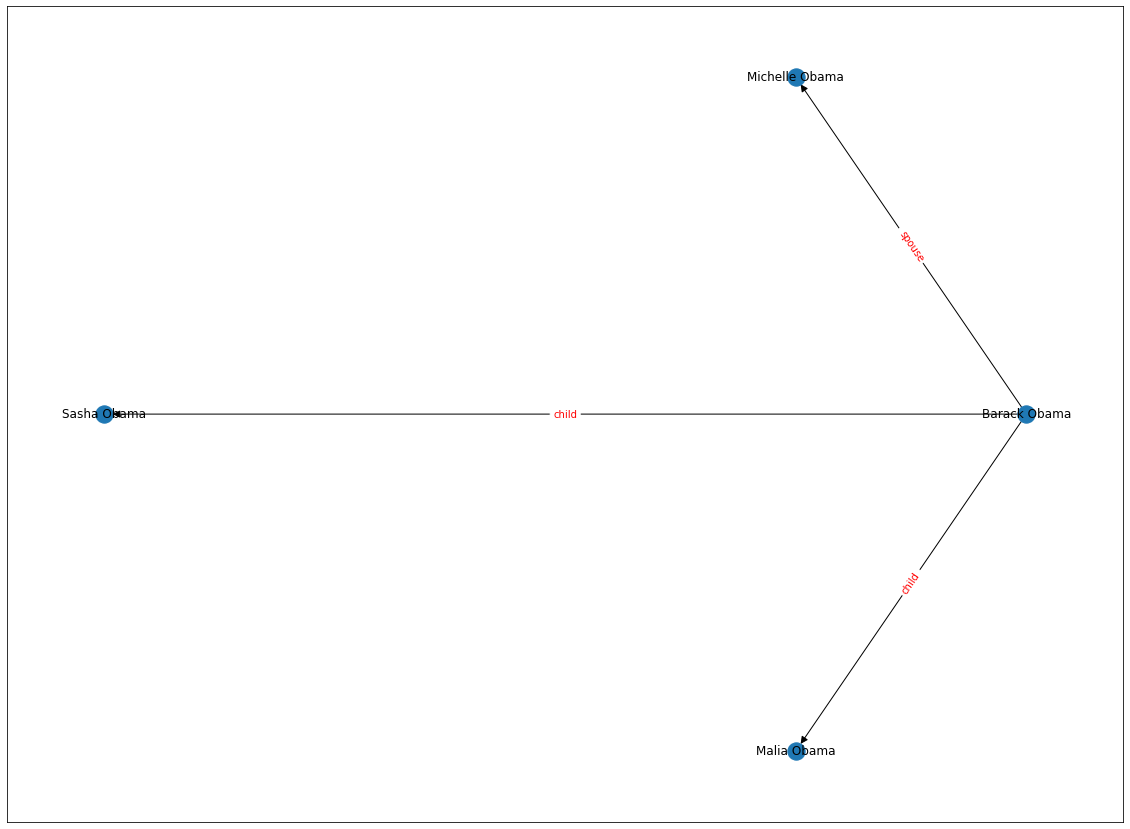

In [29]:
sparql_query = """
#defaultView:Graph
SELECT ?item ?linkTo ?prop (?itemLabel AS ?source_node) (?linkToLabel AS ?target_node)  (?propLabel AS ?edge_label)
WHERE
{
  BIND(wd:Q76 AS ?item)
  VALUES ?prop { wdt:P26 wdt:P40 }
  ?item ?prop ?linkTo .
  ?item rdfs:label ?itemLabel .
  ?linkTo rdfs:label ?linkToLabel .
  ?propFull wikibase:directClaim ?prop .
  ?propFull rdfs:label ?propLabel .
  FILTER(LANG(?itemLabel)="en")
  FILTER(LANG(?linkToLabel)="en")
  FILTER(LANG(?propLabel)="en")
}
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
graph = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='Graph')
graph.plot()

# Map

In [34]:
sparql_query = """
#added 2017-08
#Map of hospitals
#defaultView:
SELECT * WHERE {
  ?item wdt:P31/wdt:P279* wd:Q16917;
        wdt:P625 ?point .
  ?item rdfs:label ?itemLabel.
  
  FILTER (lang(?itemLabel) = 'en')
}
LIMIT 1000
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
map_ = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart="Map")
map_.plot()

# imageGrid

In [46]:
sparql_query = """
    #images of cat
    #defaultView:ImageGrid
    SELECT ?item ?itemLabel ?pic
    WHERE
    {
    ?item wdt:P31 wd:Q146 .
    ?item wdt:P18 ?pic
    SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" }
    }
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
img = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='ImageGrid')
img.plot()

In [ ]:
sparql_query = """
#images of horses
SELECT ?item ?itemLabel ?pic
WHERE
{
  ?item wdt:P31 wd:Q726 . 
  ?item wdt:P18 ?pic
        SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" }
}
LIMIT 200
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
img = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='ImageGrid')
img.plot()

In [ ]:
sparql_query = """
#images of horses
SELECT ?item ?itemLabel ?pic
WHERE
{
  ?item wdt:P31 wd:Q726 .
  ?item wdt:P18 ?pic
        SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en" }
}
LIMIT 52
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
img = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='ImageGrid')
img.plot()

# No result data

In [32]:
sparql_query = """
#Kandidaten voor de Nederlandse TK verkiezingen van 2017
#defaultView:Dimensions
SELECT ?positie_op_lijst ?genderLabel ?occupationLabel ?politieke_partijLabel WHERE {
  VALUES ?politieke_partij {wd:Q747910 wd:Q275441}
  ?item p:P3602 ?node.
  ?item wdt:P21 ?gender.
  ?item wdt:P106 ?occupation.
  ?node ps:P3602 wd:Q16061881.
  ?node pq:P1545 ?positie_op_lijst.
  ?node pq:P1268 ?politieke_partij.
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],nl". }
}
    """
#to query another endpoint, change the URL for the service and the query
sparql_service_url = "https://query.wikidata.org/sparql"
chart = vkg(sparql_query=sparql_query, sparql_service_url=sparql_service_url, chart='tabel')
chart.plot()

No matching records found
